# Data analysis to study COVID-19

*Using Biopython and Matplotlib libraries and the I-TASSER online tool to study the SARS-CoV-2 genome and one of its protein: the Membrane Glycoprotein.*


This project was made for study purposes only. If you find any errors, please let me know.

First we're going to install the Biopython library using pip.

In [ ]:
!pip3 install biopython

     |████████████████████████████████| 2.3MB 2.5MB/s 


Fetching the SARS-CoV-2 complete genome from the NCBI database. We're using the *Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/BRA/SP02cc/2020* comlete genome for this study. The ID was taken from [this link](https://www.ncbi.nlm.nih.gov/nuccore/1832306788).

In [ ]:
from Bio import Entrez, SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(
    # https://www.ncbi.nlm.nih.gov/nuccore/MT350282.1
    db="nucleotide", rettype="gb", retmode="text", id="1832306788"
) as handle:
    record = SeqIO.read(handle, "gb") # using "gb" as an alias for "genbank"

## Nucleobases

Nucleobases are naturally occurring compounds, which form the differentiating component of nucleotides; five bases occur in nature, three of which are common to RNA and DNA (uracil replaces thymine in RNA).

Bases are divided into two groups, purines and pyrimidines, based on their chemical structure. Purines are larger, double-ring molecules comprising adenine and guanine, whereas pyrimidines have only a single-ring structure and comprise cytosine and thymine/uracil. Because of the different size of the two types of nucleobases, purines can only base pair with pyrimidines in order to preserve the DNA molecule's constant width. More specifically, the only base pairs that will fit the structure of the particular molecule are adenine-thymine and cytosine-guanine. Accordingly, we say that these pairs of bases are complements of each other.
[Source](http://rosalind.info/glossary/nucleobase/)


### Analyzing
First we're going to create a "bases" dictionary with all of the nucleobases (A, T, C, G) to count the quantity of each one.

In the dictionary we're going to store the positions that each nucleobase appears to be able to analyze their ordenation as well.


In [ ]:
bases = {'A':[], 'T':[],
         'C':[], 'G':[]
        }

# record.seq stores the nucleobases
for idx, base in enumerate(record.seq):
  bases[base].append(idx+1)

bases_quantities = [len(bases['A']), len(bases['T']), len(bases['C']), len(bases['G'])]
bases_quantities

[8955, 9596, 5491, 5861]

### Plotting

We can plot the dictionary to observe the quantity and the progression of each nucleobase in the SARS-CoV-2 genome.

#### Frequency

The nucleobase *T* represents almost 30% of the COVID-19 genome with 9596 replications. Followed by the nucleobase *A* with 8955, *G* with 5861, *C* with 5491, respectively.

[9596, 8955, 5861, 5491]

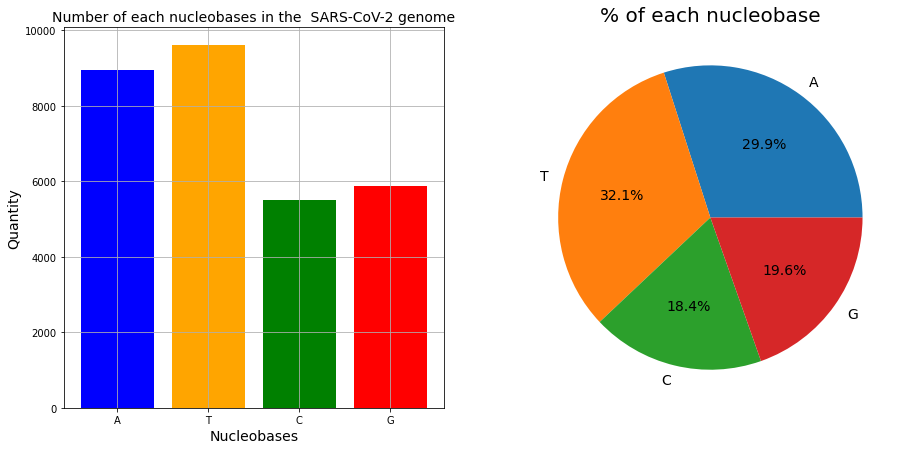

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7), facecolor='w')

plt.subplot(121)
plt.grid(True)
plt.bar(bases.keys(), bases_quantities, linewidth=1, color=['b', 'orange', 'g', 'r'])
plt.xlabel('Nucleobases', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title("Number of each nucleobases in the  SARS-CoV-2 genome", fontsize=14)

plt.subplot(122)
plt.pie(bases_quantities, labels=bases.keys(), autopct='%1.1f%%',  textprops=dict(fontsize=14))
plt.title("% of each nucleobase", fontsize=20)

sorted(bases_quantities, reverse=True)

#### Progression
Using the position that they appear in we can plot the progression of the genome.

Text(0.5, 1.0, 'Quantity of each nucleobase X Quantity of total nucleobases')

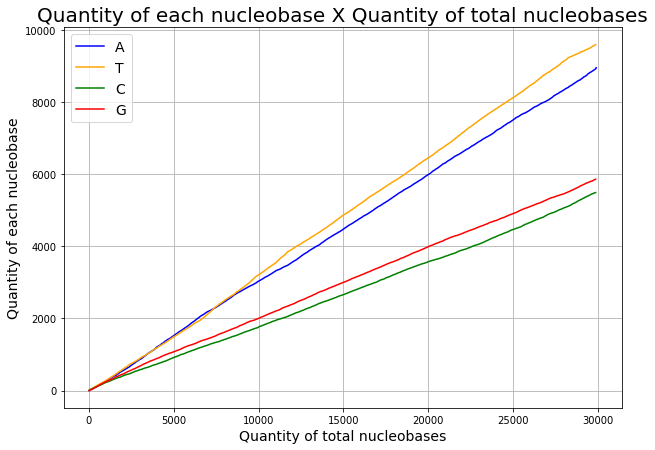

In [ ]:
fig, ax = plt.subplots(figsize=(10,7), facecolor='w')
ax.grid(True)

ax.plot(bases['A'], range(len(bases['A'])), 'blue', label='A')
ax.plot(bases['T'], range(len(bases['T'])), 'orange', label='T')
ax.plot(bases['C'], range(len(bases['C'])), 'green', label='C')
ax.plot(bases['G'], range(len(bases['G'])), 'red', label='G')

plt.ylabel('Quantity of each nucleobase', fontsize=14)
plt.xlabel('Quantity of total nucleobases', fontsize=14)
ax.legend(fontsize=14)
ax.set_title("Quantity of each nucleobase X Quantity of total nucleobases", fontsize=20)

## Proteins

Proteins are large biomolecules, or macromolecules, consisting of one or more long chains of amino acid residues. Proteins perform a vast array of functions within organisms, including catalysing metabolic reactions, DNA replication, responding to stimuli, providing structure to cells, and organisms, and transporting molecules from one location to another. Proteins differ from one another primarily in their sequence of amino acids, which is dictated by the nucleotide sequence of their genes, and which usually results in protein folding into a specific 3D structure that determines its activity.
[Source](https://en.wikipedia.org/wiki/Protein)

### Analyzing
We are going to study the **Membrane Glycoprotein** with the protein ID *QJA4164.1*. We can get the proteins using the *record.features* class from the Biopython library. Using a for loop we can print all the SARS-CoV-2 proteins.
For more information about the Coronavirus Membrane Glycoprotein acess [this link](https://link.springer.com/chapter/10.1007/978-1-4899-1531-3_6).

In [ ]:
from Bio.SeqRecord import SeqRecord
for feature in record.features:
  if feature.type == 'CDS':
    print(feature.qualifiers['product'][0] + ' - ' + feature.qualifiers['protein_id'][0])

ORF1ab polyprotein - QJA41639.1
ORF1a polyprotein - QJA41640.1
surface glycoprotein - QJA41641.1
ORF3a protein - QJA41642.1
envelope protein - QJA41643.1
membrane glycoprotein - QJA41644.1
ORF6 protein - QJA41645.1
ORF7a protein - QJA41646.1
ORF7b - QJA41647.1
ORF8 protein - QJA41648.1
nucleocapsid phosphoprotein - QJA41649.1
ORF10 protein - QJA41650.1


From the *record.features* we can get more valuable information about the protein, like the location and the amino acid sequence.

In [ ]:
position = 39 # Position in the record.featues of the membrane glycoprotein
print(record.features[position])

type: CDS
location: [26522:27191](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: gene, Value: ['M']
    Key: product, Value: ['membrane glycoprotein']
    Key: protein_id, Value: ['QJA41644.1']
    Key: translation, Value: ['MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ']



We can easily get the quantity of each amino acid using *count_amino_acids* function from the *ProteinAnalysis* class.

To acess the *ProteinAnalysis* we need to import it from *Bio.SeqUtils.ProtParam*.

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

amino_acid_seq = record.features[position].qualifiers["translation"]
protein = ProteinAnalysis(str(amino_acid_seq))

aa = {'G':'','A':'', 'L':'','V':'','I':'',
      'P':'', 'F':'', 'S':'', 'T':'', 'C':'',
      'Y':'', 'N':'', 'Q':'', 'D':'', 'E':'',
      'R':'', 'K':'', 'H':'', 'W':'', 'M':''}

for amino_acid in aa:
  amino_acid_num = protein.count_amino_acids()[amino_acid]
  aa[amino_acid] = amino_acid_num

aa = {k: v for k, v in sorted(aa.items(), key=lambda item: item[1], reverse=True)}
print(aa)

{'L': 35, 'I': 20, 'A': 19, 'S': 15, 'G': 14, 'R': 14, 'T': 13, 'V': 12, 'F': 11, 'N': 11, 'Y': 9, 'E': 7, 'K': 7, 'W': 7, 'D': 6, 'P': 5, 'H': 5, 'C': 4, 'Q': 4, 'M': 4}


### Plotting

From the graphs we can observe that the amino acid L (Leucine) is the most common one with 35 repetition, representing 15.8% of the amino acid sequence and the amino acid I (Isoleucine) is the second one with 20 repetitions, representing 9% of the amino acid sequence.


These two amino acids, that together represents 24.8% of the genome, have one of the highest hydropathy index, which means that they are very hydrophobic. This information makes a lot of sense, since we are analyzing a membrane protein. The hydropathy index was taken from [this link](https://en.wikipedia.org/wiki/Amino_acid).

Text(0.5, 1.0, '% of each amino acid in the Membrane Glycoprotein')

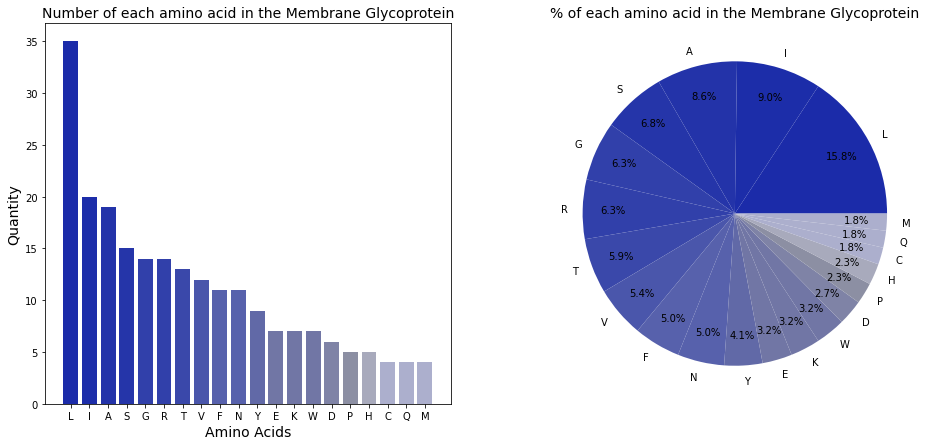

In [ ]:
plt.figure(figsize=(16,7), facecolor='w')
colors = ['#1b2ba9', '#1c2da9', '#2333a9', '#2535a9', '#3140aa', '#3140aa', '#3a48aa', '#4a56ab', '#5761ac', '#5761ac', '#6169a7', '#7176a5', '#7176a5', '#7176a5', '#7f83a6', '#8c8fa3', '#a8aabc', '#acafcd', '#acafcd', '#acafcd']

plt.subplot(121)
plt.bar(aa.keys(), aa.values(), linewidth=1, color=colors)
plt.xlabel('Amino Acids', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.title("Number of each amino acid in the Membrane Glycoprotein", fontsize=14)

plt.subplot(122)
plt.pie(aa.values(), labels=aa.keys(), autopct='%1.1f%%', pctdistance=0.8, colors=colors)
plt.title("% of each amino acid in the Membrane Glycoprotein", fontsize=14)


## Going 3D

From the [I-TASSER](https://zhanglab.ccmb.med.umich.edu/I-TASSER/) server we can get the protein structure in 3D and the function prediction. The prediction of the *SARS-CoV-2 Membrane Glycoprotein* structure made by I-TASSER is represented by the 3D model bellow.

![membrane glycoprotein structure in 3D from I-TASSER](https://drive.google.com/uc?id=1I9Sv20KvlEO21vbMXu5a0bwCJnwDocky)

Other predictions made for this protein can be accessed in [this link](https://zhanglab.ccmb.med.umich.edu/I-TASSER/output/S541297/).

The model below represents the *Membrane Glycoprotein molecular surface*.

![membrane glycoprotein Molecular Surface in 3D from I-TASSER](https://drive.google.com/uc?id=1YkUoeG4z4fgZNSYIAIG0GS7biF4Op2Uv)


### Analyzing

We can get the structure using the *get_structure* function from the *PDBParser* class.

In [ ]:
from Bio.PDB.PDBParser import PDBParser

parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure("model1", "model1.pdb")
model = structure[0]
chain = model["A"]

The Atom object stores:
*   atom name (eg. "CA")
*   coordinates: atomic coordinates (x,y,z)
*   B factor: isotropic B factor (aka temperature factor)
*   occupancy (0.0-1.0)
*   alternative location specifier for disordered atoms
*   full atom name (with spaces - e.g. " CA ")
*   atom element (e.g. "C" for Carbon, "HG" for mercury, "None" for unknown)

We can print the five firsts residues with their atoms browsing through the chains in the structure.

In [ ]:
for idx, residue in enumerate(chain):

  print(residue)
  for atom in residue:
    print(atom, end='')
  print('\n')
  if idx == 4:
    break

<Residue MET het=  resseq=1 icode= >
<Atom N><Atom CA><Atom HA><Atom CB><Atom HB1><Atom HB2><Atom CG><Atom HG1><Atom HG2><Atom SD><Atom CE><Atom HE1><Atom HE2><Atom HE3><Atom C><Atom O>

<Residue ALA het=  resseq=2 icode= >
<Atom N><Atom H><Atom CA><Atom HA><Atom CB><Atom HB1><Atom HB2><Atom HB3><Atom C><Atom O>

<Residue ASP het=  resseq=3 icode= >
<Atom N><Atom H><Atom CA><Atom HA><Atom CB><Atom HB1><Atom HB2><Atom CG><Atom OD1><Atom OD2><Atom C><Atom O>

<Residue SER het=  resseq=4 icode= >
<Atom N><Atom H><Atom CA><Atom HA><Atom CB><Atom HB1><Atom HB2><Atom OG><Atom HG><Atom C><Atom O>

<Residue ASN het=  resseq=5 icode= >
<Atom N><Atom H><Atom CA><Atom HA><Atom CB><Atom HB1><Atom HB2><Atom CG><Atom OD1><Atom ND2><Atom 1HD2><Atom 2HD2><Atom C><Atom O>



Extracting *polypeptides* from a *Structure* object.

In [ ]:
from Bio.PDB.Polypeptide import PPBuilder 

model_nr = 1
ppb=PPBuilder()
for pp in ppb.build_peptides(structure):
  print(pp.get_sequence())

MADSNGTITVEELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ


We can get more useful data using the *ProteinAnalysis* function. For more information about each function acess [this link](https://biopython.org/wiki/ProtParam).

These datas are fundamental to analyse and understand the physicochemical properties of the protein.


In [ ]:
X = ProteinAnalysis(str(pp.get_sequence()))

print("Molecular weight: %0.2f kilodaltons" % X.molecular_weight())
print("Aromaticity: %0.2f" % X.aromaticity())
print("Instability index: %0.2f" % X.instability_index())
print("Isoeletric point: %0.2f" % X.isoelectric_point())

print("\nPercentage of each secondary structure: ")
sec_struc = X.secondary_structure_fraction()  # [helix, turn, sheet]
print("Helix: %0.2f" % sec_struc[0])  # helix
print("Turn: %0.2f" % sec_struc[1])  # turn
print("Sheet: %0.2f \n" % sec_struc[2])  # sheet

epsilon_prot = X.molar_extinction_coefficient()  # [reduced, oxidized]
print("Molar extinction coefficient with reduced cysteines: %0.2f" % epsilon_prot[0])  # with reduced cysteines
print("Molar extinction coefficient with disulfid bridges: %0.2f\n" % epsilon_prot[1])  # with disulfid bridges

print("Gravy: %0.2f" % X.gravy())
print("Flexibility: %0.2f" % X.flexibility()[0])
print("Charge at pH 6: %0.2f" % X.charge_at_pH(6))

Molecular weight: 25146.31 kilodaltons
Aromaticity: 0.12
Instability index: 39.14
Isoeletric point: 9.51

Percentage of each secondary structure: 
Helix: 0.42
Turn: 0.20
Sheet: 0.29 

Molar extinction coefficient with reduced cysteines: 51910.00
Molar extinction coefficient with disulfid bridges: 52160.00

Gravy: 0.45
Flexibility: 1.02
Charge at pH 6: 10.61


### Plotting

Plotting every pH from 0 to 14 we get a decreasing charge slope.

pH 0: 27.00, pH 1: 26.99, pH 2: 26.89, pH 3: 26.04, pH 4: 21.55, pH 5: 14.69, pH 6: 10.61, pH 7: 7.91, 
pH 8: 6.62, pH 9: 3.55, pH 10: -4.77, pH 11: -12.78, pH 12: -19.84, pH 13: -25.71, pH 14: -26.86, 

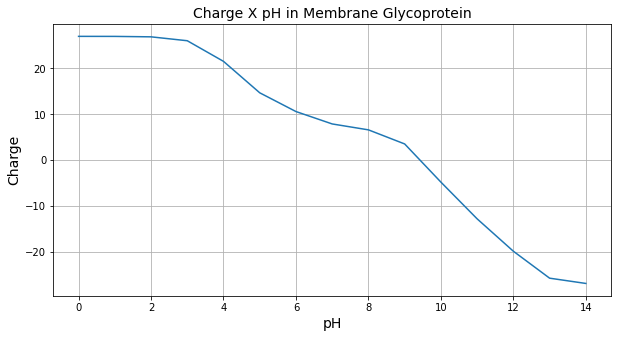

In [ ]:
charges = []
for pH in range(0, 15):
  charges.append(X.charge_at_pH(pH))

plt.figure(figsize=(10,5), facecolor='w')
plt.grid(True)
plt.plot(charges)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Charge', fontsize=14)
plt.title("Charge X pH in Membrane Glycoprotein", fontsize=14)

for pH, charge in enumerate(charges):
  print("pH %s: %.2f" % (pH, charge), end=', ')
  if pH == 7:
    print('')

## Resources

* [SARS-CoV-2 genome](https://www.ncbi.nlm.nih.gov/nuccore/MT350282.1)
* [Biopython documentation](http://biopython.org/DIST/docs/tutorial/Tutorial.html)
* [Protein Data Bank](https://www.rcsb.org/)
* [I-TASSER](https://zhanglab.ccmb.med.umich.edu/I-TASSER/)
*   [Why Are Proteins Charged?](https://projects.iq.harvard.edu/files/gmwgroup/files/951.pdf)
* [Modeling of the SARS-CoV-2 Genome](https://zhanglab.ccmb.med.umich.edu/COVID-19/)
* [Protein Folding](https://chem.libretexts.org/Bookshelves/Biological_Chemistry/Supplemental_Modules_(Biological_Chemistry)/Proteins/Protein_Structure/Protein_Folding)
* [The species Severe acute respiratory syndrome-related coronavirus: classifying 2019-nCoV and naming it SARS-CoV-2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7095448/)
